In [ ]:

import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

dados_bruto = pd.read_csv("/content/students_mental_health_survey.csv")

dados = dados_bruto.dropna()
dados.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 6995 entries, 0 to 7020
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Age                          6995 non-null   int64  
 1   Course                       6995 non-null   object 
 2   Gender                       6995 non-null   object 
 3   CGPA                         6995 non-null   float64
 4   Stress_Level                 6995 non-null   int64  
 5   Depression_Score             6995 non-null   int64  
 6   Anxiety_Score                6995 non-null   int64  
 7   Sleep_Quality                6995 non-null   object 
 8   Physical_Activity            6995 non-null   object 
 9   Diet_Quality                 6995 non-null   object 
 10  Social_Support               6995 non-null   object 
 11  Relationship_Status          6995 non-null   object 
 12  Substance_Use                6995 non-null   object 
 13  Counseling_Service

###Para facilitiar a construção do código, criamos uma variável para cada coluna

In [ ]:

stress = "Stress_Level"
depre = "Depression_Score"
ansiedade = "Anxiety_Score"
social = "Social_Support"
sono = "Sleep_Quality"
diet = "Diet_Quality"
relac = "Relationship_Status"
subs = "Substance_Use"
creditos = "Semester_Credit_Load"
curso ="Course"
casa = "Residence_Type"
aconselhamento = "Counseling_Service_Use"
atvdd_fisica = 'Physical_Activity'
stress_f = "Financial_Stress"

###Trocamos a qualidade Low, Moderate, High para, respectivamente, 0,1,2 em algumas colunas.

In [ ]:
cont = 2

for x in dados[sono].unique():
  dados[sono] = dados[sono].replace(x, cont)
  cont -= 1

dados[sono].unique()


cont = 0

for x in dados[aconselhamento].unique():
  dados[aconselhamento] = dados[aconselhamento].replace(x, cont)
  cont += 1

dados[aconselhamento].unique()


cont = 0

for x in ['Low','Moderate','High']:
  dados[atvdd_fisica] = dados[atvdd_fisica].replace(x, cont)
  cont += 1

dados[atvdd_fisica].unique()

dados.head(10)

<ipython-input-108-e3f61b05cac9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados[sono] = dados[sono].replace(x, cont)
<ipython-input-108-e3f61b05cac9>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados[aconselhamento] = dados[aconselhamento].replace(x, cont)
<ipython-input-108-e3f61b05cac9>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.py

,Age,Course,Gender,CGPA,Stress_Level,Depression_Score,Anxiety_Score,Sleep_Quality,Physical_Activity,Diet_Quality,Social_Support,Relationship_Status,Substance_Use,Counseling_Service_Use,Family_History,Chronic_Illness,Financial_Stress,Extracurricular_Involvement,Semester_Credit_Load,Residence_Type
0,25,Others,Male,3.56,3,3,2,2,1,Good,Moderate,Married,Never,0,No,No,2,Moderate,17,On-Campus
1,24,Engineering,Female,2.44,0,3,0,1,0,Average,Low,Single,Occasionally,1,No,No,3,Low,27,On-Campus
2,19,Business,Female,3.74,4,0,3,2,0,Average,Moderate,In a Relationship,Never,1,No,No,4,High,15,On-Campus
4,18,Business,Male,3.40,3,3,4,2,0,Average,High,Married,Never,0,No,Yes,0,High,23,On-Campus
5,21,Medical,Female,3.35,2,4,3,2,1,Good,High,Single,Never,0,No,No,5,Moderate,19,Off-Campus
6,18,Law,Male,3.65,2,2,5,2,1,Average,Moderate,Single,Never,0,No,No,4,Moderate,20,Off-Campus
7,21,Business,Female,3.40,0,3,3,1,0,Average,Low,Married,Never,0,Yes,No,3,Moderate,23,On-Campus
8,24,Medical,Male,3.80,3,2,1,0,0,Average,Moderate,Single,Frequently,0,Yes,No,2,Low,28,On-Campus
12,22,Computer Science,Male,3.19,1,1,3,1,1,Average,Moderate,In a Relationship,Never,1,No,No,1,High,17,On-Campus
13,27,Medical,Male,3.26,3,2,2,1,1,Average,High,In a Relationship,Never,1,No,No,1,Moderate,17,With Family


#**Boxplot**

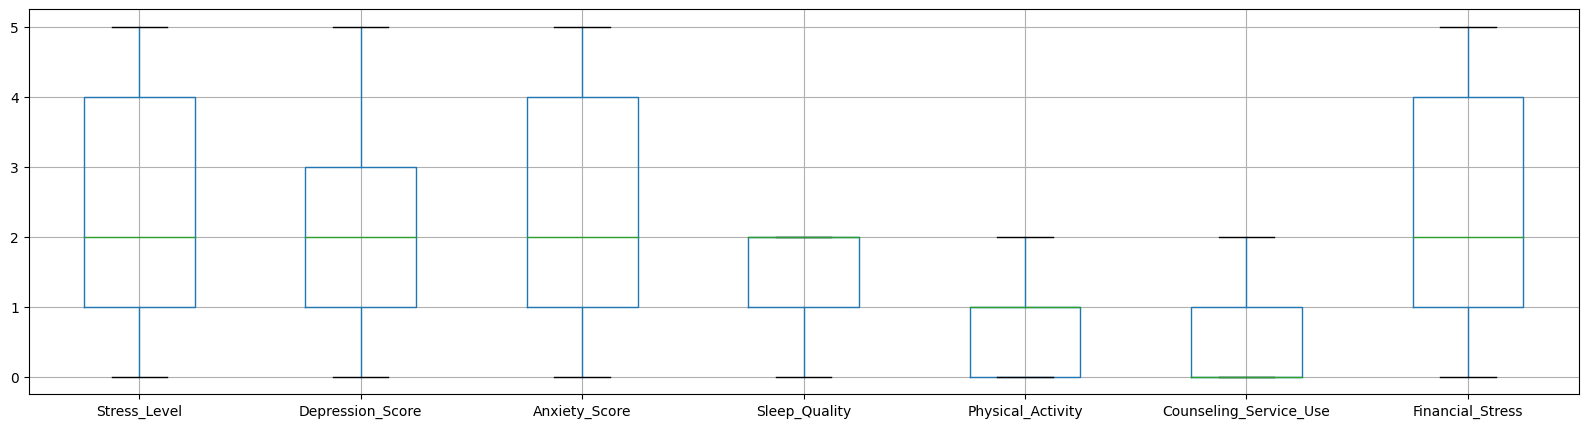

In [ ]:
boxplot = dados.boxplot(column=[ stress, depre, ansiedade, sono, atvdd_fisica,"Counseling_Service_Use","Financial_Stress"], figsize=(20,5))

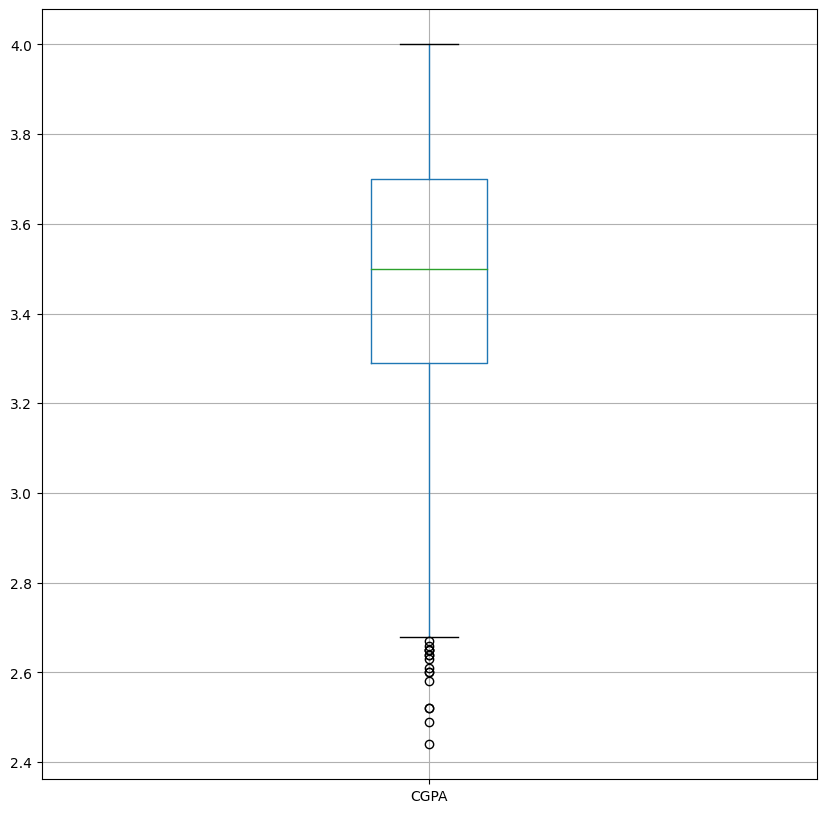

In [ ]:
boxplot2 = dados.boxplot(column=['CGPA'], figsize=(10,10))

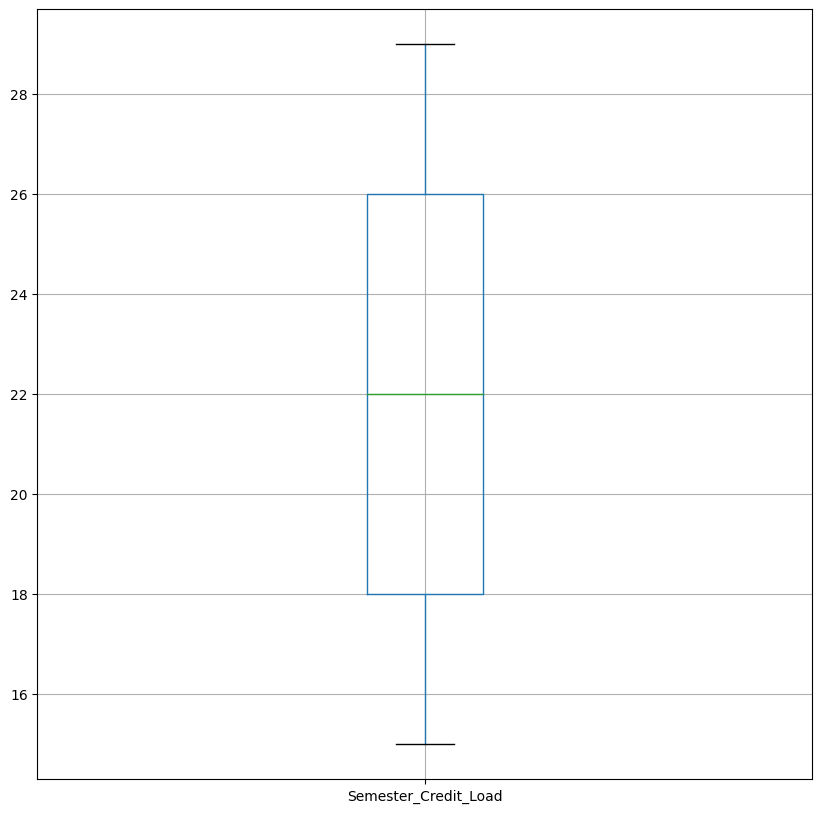

In [ ]:
boxplot3 = dados.boxplot(column=['Semester_Credit_Load'], figsize=(10,10))

#**Medidas de centralidade e dispersão**

In [ ]:

for coluna in ["CGPA","Age", stress, depre, ansiedade, sono, atvdd_fisica, stress_f]:

  print('-'*30)
  print(color.DARKCYAN + coluna + color.END)
  print()
  print(f"{color.BOLD}Media:{color.END} {color.DARKCYAN}{dados[coluna].mean():.2f}{color.END}")
  print(f"{color.BOLD}Mediana:{color.END} {color.DARKCYAN}{dados[coluna].median()}{color.END}")
  print('-----')
  print(f"{color.BOLD}Desvio Padrao:{color.END} {color.DARKCYAN}{dados[coluna].std():.2f}{color.END}")
  print(f"{color.BOLD}Amplitude:{color.END} {color.DARKCYAN}{dados[coluna].max() - dados[coluna].min()}{color.END}")
  print(f"{color.BOLD}Variancia:{color.END} {color.DARKCYAN}{dados[coluna].var():.2f}{color.END}")
  print()

print('-'*30)

------------------------------
CGPA

Media: 3.49
Mediana: 3.5
-----
Desvio Padrao: 0.29
Amplitude: 1.56
Variancia: 0.08

------------------------------
Age

Media: 23.00
Mediana: 22.0
-----
Desvio Padrao: 3.86
Amplitude: 17
Variancia: 14.87

------------------------------
Stress_Level

Media: 2.43
Mediana: 2.0
-----
Desvio Padrao: 1.64
Amplitude: 5
Variancia: 2.69

------------------------------
Depression_Score

Media: 2.26
Mediana: 2.0
-----
Desvio Padrao: 1.62
Amplitude: 5
Variancia: 2.64

------------------------------
Anxiety_Score

Media: 2.30
Mediana: 2.0
-----
Desvio Padrao: 1.62
Amplitude: 5
Variancia: 2.64

------------------------------
Sleep_Quality

Media: 1.41
Mediana: 2.0
-----
Desvio Padrao: 0.66
Amplitude: 2
Variancia: 0.44

------------------------------
Physical_Activity

Media: 0.90
Mediana: 1.0
-----
Desvio Padrao: 0.70
Amplitude: 2
Variancia: 0.49

------------------------------
Financial_Stress

Media: 2.45
Mediana: 2.0
-----
Desvio Padrao: 1.71
Amplitude: 5
Vari

In [ ]:
dados.mode()

,Age,Course,Gender,CGPA,Stress_Level,Depression_Score,Anxiety_Score,Sleep_Quality,Physical_Activity,Diet_Quality,Social_Support,Relationship_Status,Substance_Use,Counseling_Service_Use,Family_History,Chronic_Illness,Financial_Stress,Extracurricular_Involvement,Semester_Credit_Load,Residence_Type
0,21,Medical,Male,4.0,3,3,3,2,1,Average,Moderate,Single,Never,0,No,No,0,Moderate,27,On-Campus
